In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [5]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo2/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo2/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [4]:
#train = pd.read_pickle('salida/nuevo2/SICK/TRAIN_2.csv_.pickle')

In [6]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
0,2,0.666667,0.0,0.0,0.938754,0.000000,0.666667,0.442326,1.521449e-12,0.000000,...,"[the{the,DET}, sale{sale,NOUN}, was{be,AUX}, m...","[baikalfinansgroup{baikalfinansgroup,PROPN}, w...",1,0.000000,0.000000,1.547806,0.000000,1.547806,0.000000,YES
1,2,0.333333,0.0,0.0,1.489950,0.000000,0.666667,0.578691,1.521449e-12,0.000000,...,"[the{the,DET}, sale{sale,NOUN}, was{be,AUX}, m...","[yuganskneftegaz{yuganskneftegaz,NOUN}, cost{c...",1,0.000000,3.523856,2.806872,0.000000,2.806872,0.000000,NO
2,2,0.400000,0.0,0.0,1.319845,0.000000,0.600000,0.639602,0.000000e+00,0.000000,...,"[loraine{loraine,PROPN}, besides{besides,SCONJ...","[does{do,AUX}, a{a,DET}, tiger{tiger,NOUN}, ha...",1,0.000000,2.499544,2.735668,2.499544,2.735668,2.499544,UNKNOWN
3,1,0.000000,0.0,0.0,1.573299,0.000000,1.000000,0.490290,0.000000e+00,0.000000,...,"[the{the,DET}, extra{extra,ADJ}, girl{girl,NOU...","[the{the,DET}, extra{extra,ADJ}, girl{girl,NOU...",0,0.000000,3.209282,3.509043,3.209282,3.509043,3.209282,YES
4,2,0.250000,0.0,0.0,1.560829,0.000000,0.750000,0.615457,1.521449e-12,0.000000,...,"[a{a,DET}, bus{bus,NOUN}, collision{collision,...","[30{30,NUM}, die{die,VERB}, in{in,ADP}, a{a,DE...",1,0.000000,1.488525,2.820291,0.000000,2.820291,0.000000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0.500000,0.0,0.5,1.730208,1.286784,0.666667,0.379049,1.924808e+00,0.001885,...,"[confident{confident,ADJ}, that{that,SCONJ}, t...","[haque{haque,PROPN}, wants{want,VERB}, to{to,P...",0,2.457328,3.106891,3.485671,0.000000,3.485671,0.000000,UNKNOWN
96,2,0.100000,0.0,0.0,1.770040,0.000000,0.900000,0.672214,1.521449e-12,0.000000,...,"[iscor{iscor,PROPN}, the{the,DET}, south{south...","[the{the,DET}, south{south,ADJ}, african{afric...",4,0.000000,3.663533,3.564216,0.000000,3.564216,0.000000,YES
97,2,0.333333,0.0,0.0,1.290500,0.000000,1.000000,0.400000,1.521449e-12,0.000000,...,"[critics{critic,NOUN}, said{say,VERB}, the{the...","[the{the,DET}, ncea{ncea,NOUN}, has{have,AUX},...",0,0.000000,3.511085,2.872425,0.000000,2.872425,0.000000,UNKNOWN
98,2,0.250000,0.0,0.0,1.503196,0.000000,1.000000,0.513265,1.521449e-12,0.000000,...,"[two{two,NUM}, other{other,ADJ}, marines{marin...","[tyler{tyler,PROPN}, jackson{jackson,PROPN}, h...",1,0.000000,3.154222,3.140752,0.000000,3.140752,0.000000,NO


In [7]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

In [8]:
indice=13
print(train.at[indice,'Texto'])

13    Alex Dyer, spokesman for the group, stated tha...
13    In conversations with Ms. Robbins, it is under...
13    Although the number of the confirmed Ebola cas...
13    People who are deaf or have hearing impairment...
13    After months of planning and build-up, Supreme...
13    The Norwegian Newspaper Corpus is a large and ...
13    "The Herald is now pleased that Kennedy can vi...
13    Leakey believed Kenya's rich wildlife, which u...
Name: Texto, dtype: object


In [9]:
train.at[5,'relacionesEncontradas']

5     Generalidad: small-small |  Generalidad: comp...
5                              Generalidad: new-new | 
5     Generalidad: typhoon-typhoon |  Generalidad: ...
5     Generalidad: woman-woman |  Generalidad H: en...
5     Generalidad: cyrillic-cyrillic |  Generalidad...
5     Generalidad: mars-mars |  Generalidad H: refe...
5     Generalidad: police-police |  Generalidad: re...
5     Generalidad H: rhino-animal |  Generalidad H:...
Name: relacionesEncontradas, dtype: object

<Axes: title={'center': 'pInflexion'}, xlabel='clases'>

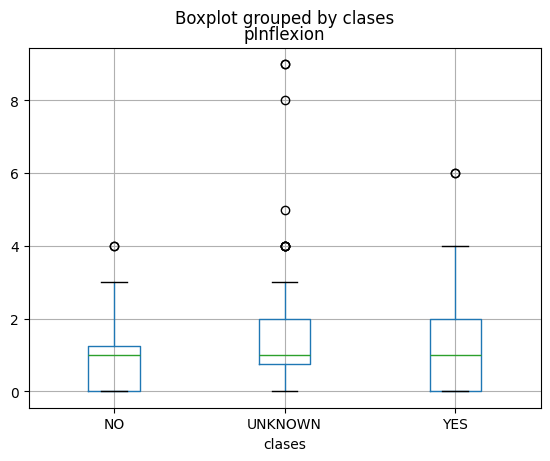

In [10]:
train.boxplot(by="clases",column=["pInflexion"])

In [11]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

array([[<Axes: title={'center': 'h_k_grupo1'}, xlabel='clases'>,
        <Axes: title={'center': 'h_k_grupo2'}, xlabel='clases'>],
       [<Axes: title={'center': 'h_k_grupo3'}, xlabel='clases'>,
        <Axes: >]], dtype=object)

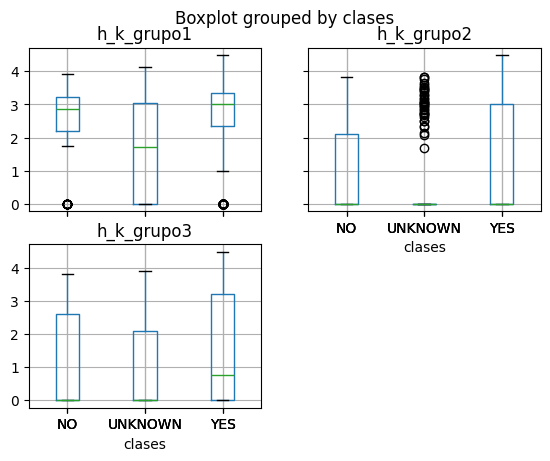

In [12]:
train.boxplot(by="clases",column=["h_k_grupo1","h_k_grupo2","h_k_grupo3"])

array([[<Axes: title={'center': 'H_grupo1'}, xlabel='clases'>,
        <Axes: title={'center': 'H_grupo2'}, xlabel='clases'>],
       [<Axes: title={'center': 'H_grupo3'}, xlabel='clases'>, <Axes: >]],
      dtype=object)

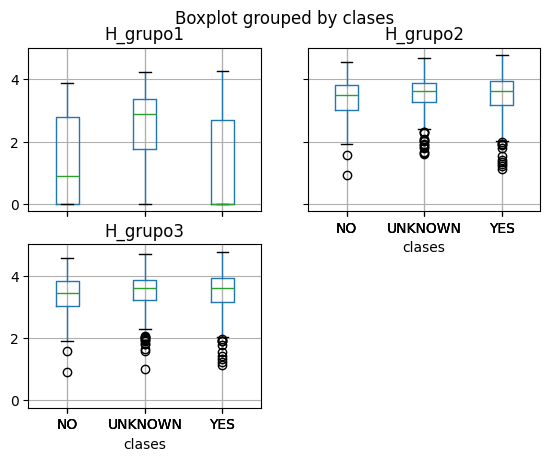

In [13]:
train.boxplot(by="clases",column=["H_grupo1","H_grupo2","H_grupo3"])

<Axes: title={'center': 'entropias'}, xlabel='clases'>

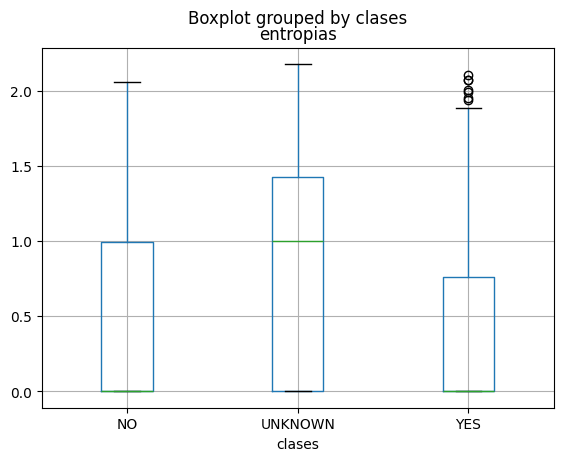

In [14]:
train.boxplot(by="clases",column=["entropias"])

In [15]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

<Axes: title={'center': 'H_grupo1'}, xlabel='clases'>

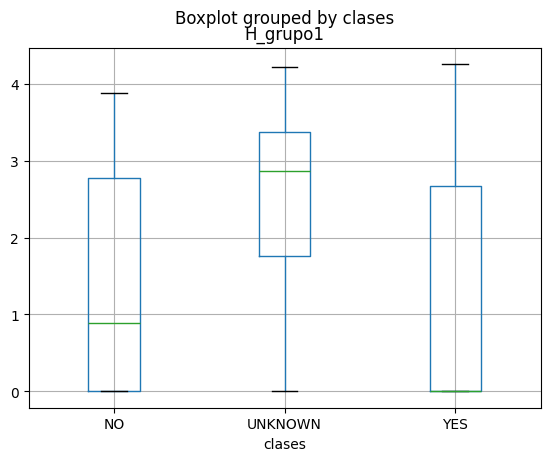

In [16]:
train.boxplot(by="clases",column=["H_grupo1"])

In [17]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

<Axes: title={'center': 'entropia_total'}, xlabel='clases'>

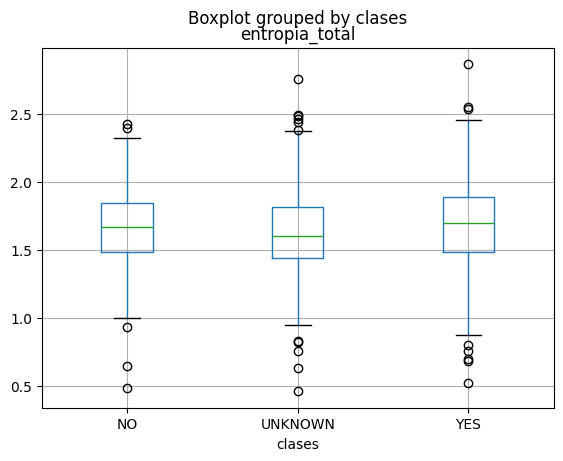

In [18]:
train.boxplot(by="clases",column=["entropia_total"])

In [19]:
train["entroG1"]=train["entropia_total"]-train["H_grupo1"]
train["entroG2"]=train["entropia_total"]-train["H_grupo2"]
train["entroG3"]=train["entropia_total"]-train["H_grupo3"]

<Axes: title={'center': 'entroG1'}, xlabel='clases'>

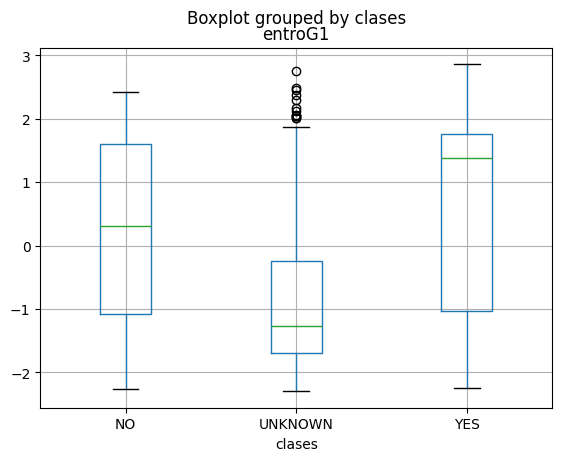

In [20]:
train.boxplot(by="clases",column=["entroG1"])

<Axes: title={'center': 'entroG2'}, xlabel='clases'>

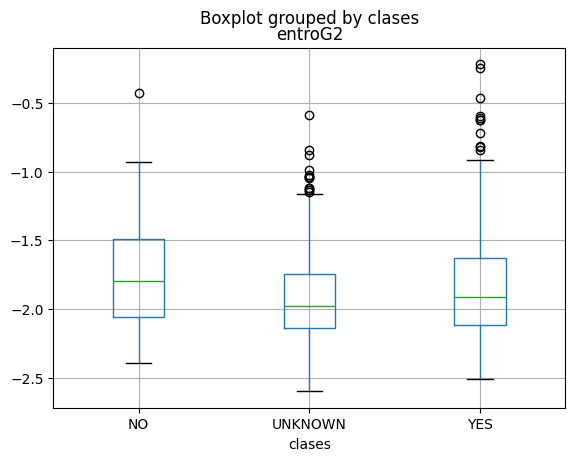

In [21]:
train.boxplot(by="clases",column=["entroG2"])

array([<Axes: title={'center': 'entropia_total'}, xlabel='clases'>,
       <Axes: title={'center': 'entropias'}, xlabel='clases'>],
      dtype=object)

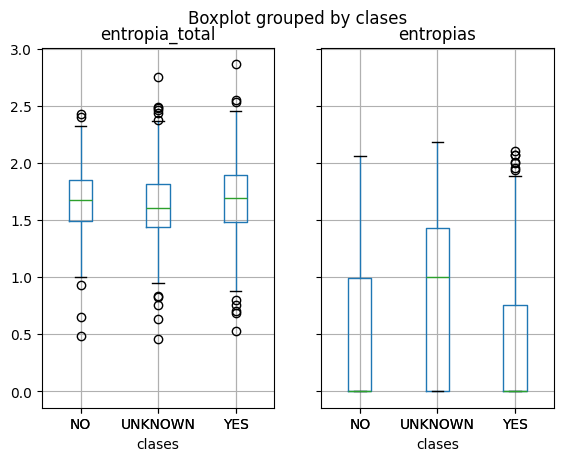

In [22]:
train.boxplot(by="clases",column=["entropia_total","entropias"])

In [32]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [23]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases,entroG1,entroG2,entroG3
0,2,0.666667,0.0,0.0,0.938754,0.000000,0.666667,0.442326,1.521449e-12,0.000000,...,0.000000,0.000000,1.547806,0.000000,1.547806,0.000000,YES,0.938754,-0.609053,-0.609053
1,2,0.333333,0.0,0.0,1.489950,0.000000,0.666667,0.578691,1.521449e-12,0.000000,...,0.000000,3.523856,2.806872,0.000000,2.806872,0.000000,NO,1.489950,-1.316921,-1.316921
2,2,0.400000,0.0,0.0,1.319845,0.000000,0.600000,0.639602,0.000000e+00,0.000000,...,0.000000,2.499544,2.735668,2.499544,2.735668,2.499544,UNKNOWN,1.319845,-1.415823,-1.415823
3,1,0.000000,0.0,0.0,1.573299,0.000000,1.000000,0.490290,0.000000e+00,0.000000,...,0.000000,3.209282,3.509043,3.209282,3.509043,3.209282,YES,1.573299,-1.935744,-1.935744
4,2,0.250000,0.0,0.0,1.560829,0.000000,0.750000,0.615457,1.521449e-12,0.000000,...,0.000000,1.488525,2.820291,0.000000,2.820291,0.000000,YES,1.560829,-1.259462,-1.259462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0.500000,0.0,0.5,1.730208,1.286784,0.666667,0.379049,1.924808e+00,0.001885,...,2.457328,3.106891,3.485671,0.000000,3.485671,0.000000,UNKNOWN,-0.727120,-1.755463,-1.755463
96,2,0.100000,0.0,0.0,1.770040,0.000000,0.900000,0.672214,1.521449e-12,0.000000,...,0.000000,3.663533,3.564216,0.000000,3.564216,0.000000,YES,1.770040,-1.794176,-1.794176
97,2,0.333333,0.0,0.0,1.290500,0.000000,1.000000,0.400000,1.521449e-12,0.000000,...,0.000000,3.511085,2.872425,0.000000,2.872425,0.000000,UNKNOWN,1.290500,-1.581925,-1.581925
98,2,0.250000,0.0,0.0,1.503196,0.000000,1.000000,0.513265,1.521449e-12,0.000000,...,0.000000,3.154222,3.140752,0.000000,3.140752,0.000000,NO,1.503196,-1.637555,-1.637555


In [24]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases', 'entroG1', 'entroG2', 'entroG3'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

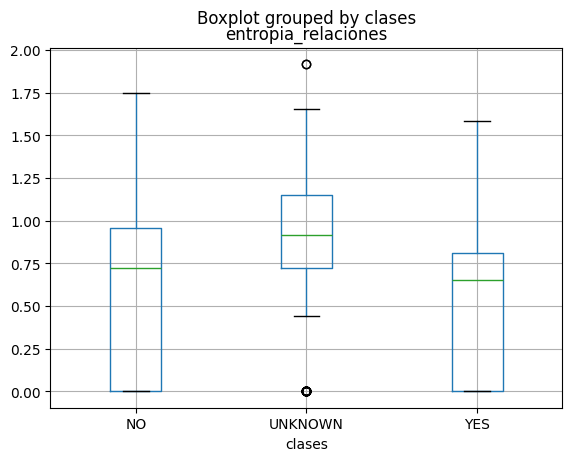

In [25]:
train.boxplot(by="clases",column=["entropia_relaciones"])

array([<Axes: title={'center': 'sumas'}, xlabel='clases'>,
       <Axes: title={'center': 'sumas_t'}, xlabel='clases'>], dtype=object)

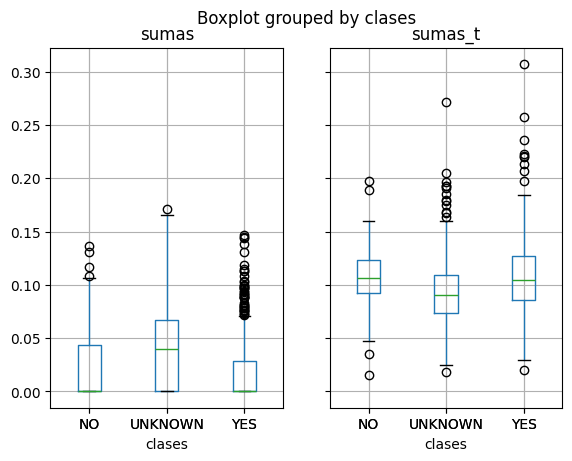

In [26]:
train.boxplot(by="clases",column=["sumas","sumas_t"])

array([<Axes: title={'center': 'overlap_ent'}, xlabel='clases'>,
       <Axes: title={'center': 'jaccard'}, xlabel='clases'>], dtype=object)

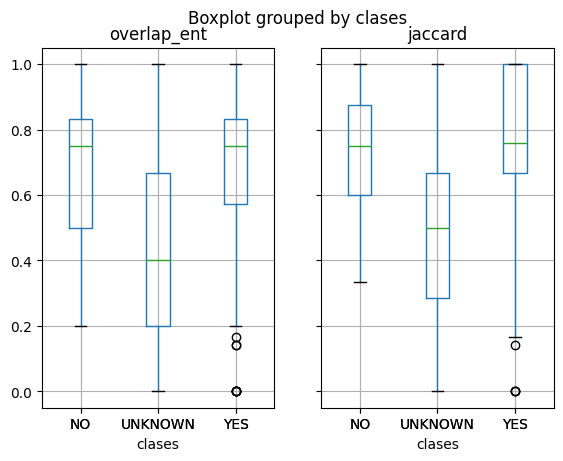

In [27]:
train.boxplot(by="clases",column=["overlap_ent","jaccard"])

# VIF

In [7]:
# MLR and Logistic Regession model fitting
# VIF computation
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
def calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
  return(vif)

In [9]:
X_p = train.iloc[:,:-1]
calculate_vif(X_p)

,variables,VIF
0,relation,6.284996
1,no_matcheadas,42.213939
2,contradiction,10.173868
3,distancias,449.929984
4,entropia_total,3.019517
5,entropias,11.603344
6,jaccard,4.848800
7,simBoW,21.994862
8,mutinf,570.889432
9,mearts,12.980538


In [10]:
entail_train=train[train["clases"]=="ENTAILMENT"]
neutral_train=train[train["clases"]=="NEUTRAL"]
contradiction_train=train[train["clases"]=="CONTRADICTION"]
entail_train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
2,2,0.250000,0.0,0.000000,2.176234,2.176234,0.400000,0.617213,4.551917,0.000000,...,0.000000,5,0.000,7,0.815873,0.000000,0,0,0.750000,ENTAILMENT
11,1,0.000000,0.0,0.000000,2.752715,2.752715,1.000000,1.000000,4.682331,0.000000,...,0.000000,6,0.000,6,0.722222,0.000000,0,0,1.000000,ENTAILMENT
15,2,0.250000,0.0,0.000000,2.454773,2.454773,0.666667,0.670820,4.519764,0.000000,...,0.721928,5,0.000,6,0.783333,0.000000,0,0,0.750000,ENTAILMENT
19,2,0.333333,0.0,0.000000,1.622556,1.622556,0.666667,0.666667,4.563081,0.000000,...,0.000000,4,0.000,4,0.944444,0.000000,0,0,0.666667,ENTAILMENT
27,2,0.250000,0.0,0.000000,1.949351,1.949351,0.750000,0.676123,4.551264,0.000000,...,0.650022,6,0.000,8,0.620635,0.000000,0,0,0.750000,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,2,0.666667,0.0,0.000000,2.183894,2.183894,0.250000,0.204124,4.173215,0.000000,...,0.000000,3,0.000,8,0.486111,0.000000,0,0,0.333333,ENTAILMENT
4325,2,0.750000,0.0,0.000000,2.356475,2.356475,0.333333,0.166667,4.144079,0.000000,...,0.811278,4,0.000,9,0.490741,0.000000,0,0,0.250000,ENTAILMENT
4326,2,0.500000,0.0,0.000000,2.277936,2.277936,0.666667,0.333333,4.330568,0.000000,...,0.811278,4,0.000,9,0.574074,0.000000,0,0,0.500000,ENTAILMENT
4330,2,0.333333,0.0,1.273604,2.070981,0.611833,1.000000,0.816497,0.496911,0.004733,...,1.061278,8,0.125,6,0.682540,0.492146,0,0,0.666667,ENTAILMENT


In [11]:
X_e = entail_train.iloc[:,:-1]
calculate_vif(X_e)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,relation,4.351251
1,no_matcheadas,271.727081
2,contradiction,3.440233
3,distancias,707.797792
4,entropia_total,13.721181
5,entropias,31.562343
6,jaccard,2.976005
7,simBoW,10.422150
8,mutinf,842.344945
9,mearts,19.322793


In [12]:
neutral_train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.000000,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
1,-1,0.285714,0.142857,0.000000,1.912939,1.912939,0.333333,0.668153,4.385955,0.000000,...,0.543564,8,0.000000,7,0.910714,0.000000,0,0,0.571429,NEUTRAL
3,2,0.714286,0.000000,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.000000,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
5,2,0.666667,0.000000,1.351741,1.729574,0.811278,0.333333,0.408248,0.392981,0.012137,...,1.500000,4,0.250000,3,0.611111,0.748371,0,0,0.333333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.000000,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4436,-1,1.000000,0.166667,1.263298,1.687640,0.316689,0.000000,0.000000,-0.044869,0.006522,...,0.918296,6,0.333333,5,0.288889,0.210428,0,0,0.000000,NEUTRAL
4437,2,0.666667,0.000000,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [13]:
X_n = neutral_train.iloc[:,:-1]
calculate_vif(X_n)

,variables,VIF
0,relation,6.433041
1,no_matcheadas,27.681564
2,contradiction,8.791443
3,distancias,350.517737
4,entropia_total,2.498699
5,entropias,10.295622
6,jaccard,4.198966
7,simBoW,18.363626
8,mutinf,440.875194
9,mearts,11.054103


In [14]:
X_c = contradiction_train.iloc[:,:-1]
calculate_vif(X_c)

,variables,VIF
0,relation,9.821702
1,no_matcheadas,69.332633
2,contradiction,45.267650
3,distancias,585.959414
4,entropia_total,4.569375
5,entropias,8.649492
6,jaccard,3.487146
7,simBoW,17.093250
8,mutinf,636.621772
9,mearts,15.795986


In [15]:
train.describe()

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
count,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,...,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000
mean,1.213336,0.400183,0.059836,0.535771,1.996702,1.474212,0.548487,0.589843,2.749421,0.002421,...,0.071187,0.570584,4.753773,0.145766,4.901104,0.682137,0.226662,0.042127,0.048209,0.559665
std,1.184717,0.319605,0.126465,0.633021,0.376755,0.773670,0.309419,0.310121,2.063032,0.003340,...,0.261511,0.575295,1.821327,0.205189,1.864832,0.260569,0.361825,0.200901,0.214232,0.311113
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.415037,0.000000,0.000000,-0.940803,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.125000,0.000000,0.000000,1.794737,0.748488,0.333333,0.333333,0.380758,0.000000,...,0.000000,0.000000,3.000000,0.000000,3.000000,0.533333,0.000000,0.000000,0.000000,0.333333
50%,2.000000,0.333333,0.000000,0.000000,2.040224,1.713119,0.666667,0.666667,4.203370,0.000000,...,0.000000,0.650022,4.000000,0.000000,5.000000,0.722222,0.000000,0.000000,0.000000,0.666667
75%,2.000000,0.666667,0.000000,1.285544,2.250000,2.124029,0.750000,0.866025,4.590860,0.005098,...,0.000000,0.970951,6.000000,0.250000,6.000000,0.916667,0.370344,0.000000,0.000000,0.750000
max,2.000000,1.000000,1.000000,1.458625,3.101410,3.101410,1.000000,1.000000,4.842156,0.044770,...,2.000000,2.000000,14.000000,1.000000,14.000000,1.000000,2.321928,1.000000,1.000000,1.000000


In [16]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [17]:
train[(train["relation"]==1) & (train["clases"]=="ENTAILMENT")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
11,1,0.0,0.0,0.0,2.752715,2.752715,1.00,1.000000,4.682331,0.0,...,0.0,6,0.0,6,0.722222,0.0,0,0,1.0,ENTAILMENT
42,1,0.0,0.0,0.0,1.791737,1.791737,0.75,0.666667,4.535674,0.0,...,0.0,5,0.0,5,0.944444,0.0,0,0,1.0,ENTAILMENT
54,1,0.0,0.0,0.0,1.825011,1.825011,1.00,0.866025,4.724540,0.0,...,0.0,3,0.0,4,0.916667,0.0,0,0,1.0,ENTAILMENT
60,1,0.0,0.0,0.0,1.939471,1.939471,0.75,1.000000,4.719276,0.0,...,0.0,5,0.0,5,0.600000,0.0,0,0,1.0,ENTAILMENT
78,1,0.0,0.0,0.0,2.608695,2.608695,0.75,0.894427,4.740391,0.0,...,0.0,4,0.0,5,0.933333,0.0,0,0,1.0,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1,0.0,0.0,0.0,2.103377,2.103377,0.80,0.857143,4.578054,0.0,...,0.0,7,0.0,7,0.849206,0.0,0,0,1.0,ENTAILMENT
4260,1,0.0,0.0,0.0,1.810699,1.810699,1.00,1.000000,4.745842,0.0,...,0.0,5,0.0,5,1.000000,0.0,0,0,1.0,ENTAILMENT
4287,1,0.0,0.0,0.0,2.156112,2.156112,1.00,0.935414,4.672392,0.0,...,0.0,7,0.0,8,0.958333,0.0,0,0,1.0,ENTAILMENT
4295,1,0.0,0.0,0.0,2.641604,2.641604,1.00,1.000000,4.680834,0.0,...,0.0,6,0.0,6,1.000000,0.0,0,0,1.0,ENTAILMENT


In [18]:
train[(train["relation"]==2) & (train["clases"]=="NEUTRAL")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.0,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
3,2,0.714286,0.0,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.0,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
5,2,0.666667,0.0,1.351741,1.729574,0.811278,0.333333,0.408248,0.392981,0.012137,...,1.500000,4,0.250000,3,0.611111,0.748371,0,0,0.333333,NEUTRAL
6,2,1.000000,0.0,0.000000,1.675239,1.675239,0.500000,0.288675,4.125743,0.000000,...,0.918296,3,0.000000,7,0.694444,0.000000,0,0,0.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,2,1.000000,0.0,1.310024,1.579121,0.457007,0.000000,0.000000,-0.040274,0.007251,...,1.556657,7,0.428571,6,0.000000,0.136487,0,0,0.000000,NEUTRAL
4434,2,1.000000,0.0,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.0,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4437,2,0.666667,0.0,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [19]:
train[(train["relation"]==-1) & (train["clases"]=="CONTRADICTION")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
14,-1,0.00,0.250000,0.000000,1.723231,1.723231,1.000000,0.894427,3.745041,0.000000,...,0.000000,5,0.00,6,0.933333,0.000000,1,0,0.750000,CONTRADICTION
36,-1,0.00,0.333333,1.369428,1.188722,0.270426,0.666667,0.866025,0.614229,0.012118,...,0.811278,4,0.25,3,0.916667,0.666667,0,0,0.666667,CONTRADICTION
76,-1,0.00,0.250000,0.000000,2.684184,2.684184,1.000000,0.935414,4.752390,0.000000,...,0.000000,4,0.00,5,0.944444,0.000000,0,0,0.750000,CONTRADICTION
79,-1,0.00,0.250000,0.000000,2.155639,2.155639,0.750000,1.000000,4.740391,0.000000,...,0.000000,4,0.00,4,1.000000,0.000000,0,0,0.750000,CONTRADICTION
89,-1,0.00,0.250000,0.000000,1.527507,1.527507,0.500000,1.000000,4.695161,0.000000,...,0.000000,6,0.00,6,1.000000,0.000000,0,0,0.750000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,-1,0.00,0.333333,0.000000,1.810699,1.810699,0.750000,1.000000,4.745842,0.000000,...,0.000000,5,0.00,5,1.000000,0.000000,0,0,0.666667,CONTRADICTION
4262,-1,0.00,0.142857,0.000000,1.919155,1.919155,0.800000,1.000000,4.674044,0.000000,...,0.000000,7,0.00,7,1.000000,0.000000,0,0,0.857143,CONTRADICTION
4266,-1,0.25,0.250000,0.000000,1.995462,1.995462,0.750000,1.000000,4.500541,0.000000,...,0.721928,5,0.00,4,1.000000,0.000000,0,0,0.500000,CONTRADICTION
4279,-1,0.00,0.333333,0.000000,1.530493,1.530493,1.000000,1.000000,4.701838,0.000000,...,0.000000,3,0.00,3,1.000000,0.000000,0,0,0.666667,CONTRADICTION


In [20]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [21]:
train[train["clases"]=="CONTRADICTION"]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
14,-1,0.000000,0.250000,0.000000,1.723231,1.723231,1.000000,0.894427,3.745041,0.000000,...,0.000000,5,0.000000,6,0.933333,0.000000,1,0,0.750000,CONTRADICTION
36,-1,0.000000,0.333333,1.369428,1.188722,0.270426,0.666667,0.866025,0.614229,0.012118,...,0.811278,4,0.250000,3,0.916667,0.666667,0,0,0.666667,CONTRADICTION
37,2,0.333333,0.000000,0.000000,2.052421,2.052421,1.000000,1.000000,4.533123,0.000000,...,0.000000,4,0.000000,4,1.000000,0.000000,0,0,0.666667,CONTRADICTION
50,2,0.200000,0.000000,1.124700,2.339496,0.339496,0.800000,1.000000,0.814954,0.004581,...,0.543564,8,0.125000,8,1.000000,0.509195,0,0,0.800000,CONTRADICTION
61,2,0.250000,0.000000,1.383111,2.054694,1.332766,0.600000,0.800000,0.766582,0.004271,...,0.721928,5,0.200000,5,0.866667,1.264386,0,1,0.750000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,-1,0.250000,0.250000,0.000000,1.995462,1.995462,0.750000,1.000000,4.500541,0.000000,...,0.721928,5,0.000000,4,1.000000,0.000000,0,0,0.500000,CONTRADICTION
4277,2,0.333333,0.000000,1.321746,1.664853,0.942925,0.833333,0.912871,0.797589,0.004191,...,0.650022,6,0.166667,5,0.944444,0.423492,0,1,0.666667,CONTRADICTION
4279,-1,0.000000,0.333333,0.000000,1.530493,1.530493,1.000000,1.000000,4.701838,0.000000,...,0.000000,3,0.000000,3,1.000000,0.000000,0,0,0.666667,CONTRADICTION
4321,-1,0.000000,0.250000,0.000000,2.552180,2.552180,1.000000,1.000000,4.759031,0.000000,...,0.000000,6,0.000000,6,1.000000,0.000000,0,0,0.750000,CONTRADICTION


## Eliminar características

In [22]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.000000,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
1,-1,0.285714,0.142857,0.000000,1.912939,1.912939,0.333333,0.668153,4.385955,0.000000,...,0.543564,8,0.000000,7,0.910714,0.000000,0,0,0.571429,NEUTRAL
2,2,0.250000,0.000000,0.000000,2.176234,2.176234,0.400000,0.617213,4.551917,0.000000,...,0.000000,5,0.000000,7,0.815873,0.000000,0,0,0.750000,ENTAILMENT
3,2,0.714286,0.000000,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.000000,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.000000,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4436,-1,1.000000,0.166667,1.263298,1.687640,0.316689,0.000000,0.000000,-0.044869,0.006522,...,0.918296,6,0.333333,5,0.288889,0.210428,0,0,0.000000,NEUTRAL
4437,2,0.666667,0.000000,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [23]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

<Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>

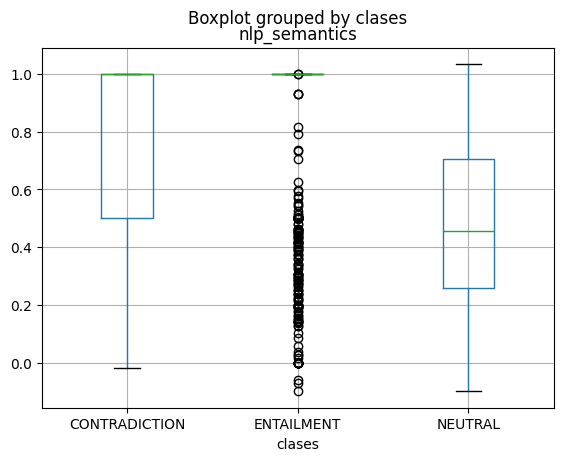

In [24]:
train.boxplot(by="clases",column=["nlp_semantics"])

In [25]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [26]:
train_m.idxmin()

relation                     contradiction
no_matcheadas                  overlap_ent
contradiction                     relation
distancias                          mutinf
entropia_total                      list_m
entropias                       distancias
jaccard                           mearts_t
simBoW                            mearts_t
mutinf                          distancias
mearts                           semantics
max_info                     no_matcheadas
sumas                        no_matcheadas
semantics                       distancias
nlp_semantics          entropia_relaciones
mutinf_t                          mearts_t
mearts_t                          mutinf_t
max_info_t                        mearts_t
sumas_t                      no_matcheadas
entail                 entropia_relaciones
contra                              entail
neutral                             entail
no_match                            mutinf
rel_conceptuales                    entail
list_comp  

In [27]:
train_m.min()

relation              -0.884141
no_matcheadas         -0.944366
contradiction         -0.884141
distancias            -0.986464
entropia_total        -0.233364
entropias             -0.818237
jaccard               -0.809039
simBoW                -0.882336
mutinf                -0.986464
mearts                -0.844830
max_info              -0.857078
sumas                 -0.684841
semantics             -0.966176
nlp_semantics         -0.807222
mutinf_t              -0.917260
mearts_t              -0.917260
max_info_t            -0.888594
sumas_t               -0.644886
entail                -0.868094
contra                -0.349948
neutral               -0.574833
no_match              -0.845412
rel_conceptuales      -0.556921
list_comp             -0.593177
diferencias           -0.746998
list_incomp           -0.326291
entropia_relaciones   -0.868094
list_M                -0.454960
list_m                -0.847015
list_T                -0.455834
Jaro-Winkler_rit      -0.687420
KL_diver

<Axes: >

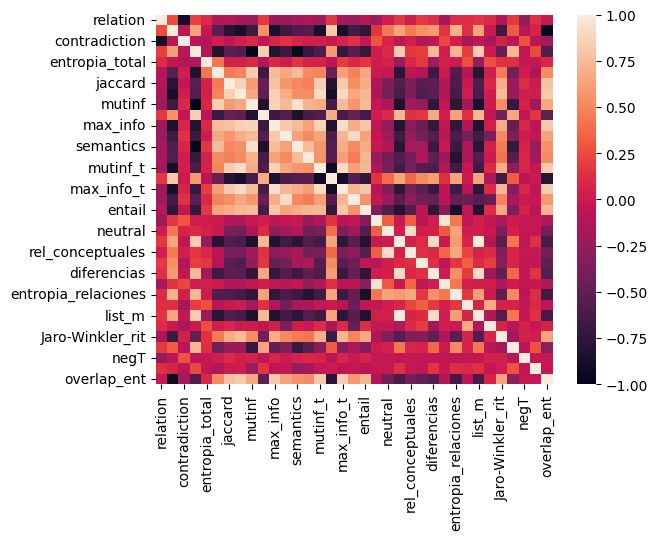

In [28]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [29]:
train_m

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
relation,1.000000,0.251385,-0.884141,0.205519,0.099374,-0.124234,-0.095925,-0.194819,-0.219099,0.167553,...,-0.182852,0.107557,0.111964,0.146804,0.100731,-0.147468,0.169722,-0.257405,0.119272,-0.017081
no_matcheadas,0.251385,1.000000,-0.065050,0.620023,-0.034071,-0.525283,-0.796045,-0.873400,-0.685991,0.541818,...,0.142770,0.695945,0.125879,0.644679,-0.011066,-0.687420,0.305776,-0.085993,0.059330,-0.944366
contradiction,-0.884141,-0.065050,1.000000,-0.085461,-0.123618,0.022316,-0.048434,0.038090,0.087847,-0.052797,...,0.229748,0.034195,-0.182334,-0.039511,-0.162674,0.042963,-0.072176,0.267540,-0.077526,-0.200172
distancias,0.205519,0.620023,-0.085461,1.000000,-0.119254,-0.818237,-0.528534,-0.571615,-0.986464,0.849074,...,0.027439,0.727942,0.191094,0.834797,-0.007359,-0.475630,0.723635,-0.056842,0.234722,-0.586418
entropia_total,0.099374,-0.034071,-0.123618,-0.119254,1.000000,0.422565,0.050500,0.045131,0.088893,-0.113993,...,0.032461,0.001576,0.259748,-0.233364,0.262038,0.138335,0.124710,-0.024688,-0.042113,0.079649
entropias,-0.124234,-0.525283,0.022316,-0.818237,0.422565,1.000000,0.449100,0.490487,0.833196,-0.675268,...,-0.004815,-0.577316,-0.091560,-0.794858,0.038434,0.446735,-0.417585,0.023802,-0.126594,0.519032
jaccard,-0.095925,-0.796045,-0.048434,-0.528534,0.050500,0.449100,1.000000,0.856852,0.596207,-0.467824,...,-0.108835,-0.591437,-0.015061,-0.580769,0.080155,0.678665,-0.237102,0.106775,0.003750,0.788460
simBoW,-0.194819,-0.873400,0.038090,-0.571615,0.045131,0.490487,0.856852,1.000000,0.650056,-0.501804,...,-0.123779,-0.640592,0.013151,-0.628876,0.010617,0.747603,-0.245004,0.032637,0.029105,0.827674
mutinf,-0.219099,-0.685991,0.087847,-0.986464,0.088893,0.833196,0.596207,0.650056,1.000000,-0.822037,...,-0.041167,-0.757157,-0.181286,-0.847015,0.004505,0.526043,-0.704871,0.061004,-0.206135,0.649006
mearts,0.167553,0.541818,-0.052797,0.849074,-0.113993,-0.675268,-0.467824,-0.501804,-0.822037,1.000000,...,0.022760,0.629420,0.132836,0.731740,-0.045942,-0.423840,0.641443,-0.057985,0.145505,-0.512581


# Procesamiento de caracteristicas y etiqueta

In [28]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases,entroG1,entroG2,entroG3
0,2,0.666667,0.0,0.0,0.938754,0.000000,0.666667,0.442326,1.521449e-12,0.000000,...,0.000000,0.000000,1.547806,0.000000,1.547806,0.000000,YES,0.938754,-0.609053,-0.609053
1,2,0.333333,0.0,0.0,1.489950,0.000000,0.666667,0.578691,1.521449e-12,0.000000,...,0.000000,3.523856,2.806872,0.000000,2.806872,0.000000,NO,1.489950,-1.316921,-1.316921
2,2,0.400000,0.0,0.0,1.319845,0.000000,0.600000,0.639602,0.000000e+00,0.000000,...,0.000000,2.499544,2.735668,2.499544,2.735668,2.499544,UNKNOWN,1.319845,-1.415823,-1.415823
3,1,0.000000,0.0,0.0,1.573299,0.000000,1.000000,0.490290,0.000000e+00,0.000000,...,0.000000,3.209282,3.509043,3.209282,3.509043,3.209282,YES,1.573299,-1.935744,-1.935744
4,2,0.250000,0.0,0.0,1.560829,0.000000,0.750000,0.615457,1.521449e-12,0.000000,...,0.000000,1.488525,2.820291,0.000000,2.820291,0.000000,YES,1.560829,-1.259462,-1.259462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0.500000,0.0,0.5,1.730208,1.286784,0.666667,0.379049,1.924808e+00,0.001885,...,2.457328,3.106891,3.485671,0.000000,3.485671,0.000000,UNKNOWN,-0.727120,-1.755463,-1.755463
96,2,0.100000,0.0,0.0,1.770040,0.000000,0.900000,0.672214,1.521449e-12,0.000000,...,0.000000,3.663533,3.564216,0.000000,3.564216,0.000000,YES,1.770040,-1.794176,-1.794176
97,2,0.333333,0.0,0.0,1.290500,0.000000,1.000000,0.400000,1.521449e-12,0.000000,...,0.000000,3.511085,2.872425,0.000000,2.872425,0.000000,UNKNOWN,1.290500,-1.581925,-1.581925
98,2,0.250000,0.0,0.0,1.503196,0.000000,1.000000,0.513265,1.521449e-12,0.000000,...,0.000000,3.154222,3.140752,0.000000,3.140752,0.000000,NO,1.503196,-1.637555,-1.637555


In [29]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases', 'entroG1', 'entroG2', 'entroG3'],
      dtype='object')

In [30]:
train=train[['no_matcheadas','contradiction','simBoW','sumas','semantics','mutinf_t',
 'contra','rel_conceptuales','list_comp','diferencias','list_incomp',
 'entropia_relaciones','negH','overlap_ent','H_grupo1','h_k_grupo2','h_k_grupo3','clases']]

In [31]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [32]:
# SICK
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [33]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

In [71]:
# train.hist(figsize=(20,10))
# plt.show()

# TEST

In [35]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo2/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo2/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [36]:
test=test.reset_index(drop=True)

In [37]:
test[(test["relation"]==1) & (test["clases"]=="YES")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
3,1,0.0,0.0,0.0,1.559855,0.0,1.0,0.654654,1.521449e-12,0.0,...,"[the{the,DET}, comunist{comunist,PROPN}, party...","[michael{michael,PROPN}, laski{laski,PROPN}, w...",1,0.0,2.503258,2.990495,0.000000,2.990495,0.000000,YES
13,1,0.0,0.0,0.0,1.698080,0.0,1.0,0.763763,1.521449e-12,0.0,...,"[in{in,ADP}, 1956{1956,NUM}, accardo{accardo,P...","[accardo{accardo,PROPN}, won{win,VERB}, the{th...",1,0.0,2.125815,2.702480,0.000000,2.702480,0.000000,YES
18,1,0.0,0.0,0.0,1.402851,0.0,1.0,0.551677,1.521449e-12,0.0,...,"[during{during,ADP}, reinsdorf{reinsdorf,PROPN...","[reinsdorf{reinsdorf,PROPN}, was{be,AUX}, the{...",1,0.0,3.326360,2.703922,0.000000,2.703922,0.000000,YES
27,1,0.0,0.0,0.0,0.911848,0.0,1.0,0.542326,1.521449e-12,0.0,...,"[natta{natta,PROPN}, was{be,AUX}, confirmed{co...","[achille{achille,PROPN}, occhetto{occhetto,PRO...",1,0.0,2.463458,2.158040,0.000000,2.158040,0.000000,YES
51,1,0.0,0.0,0.0,0.749168,0.0,1.0,0.529150,1.521449e-12,0.0,...,"[oscar{oscar,PROPN}, chisini{chisini,PROPN}, b...","[oscar{oscar,PROPN}, chisini{chisini,PROPN}, d...",2,0.0,0.000000,1.271010,0.000000,1.271010,0.000000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,1,0.0,0.0,0.0,1.402150,0.0,1.0,0.888523,1.521449e-12,0.0,...,"[a{a,DET}, former{former,ADJ}, executive{execu...","[a{a,DET}, former{former,ADJ}, executive{execu...",5,0.0,3.124844,2.834324,0.000000,2.834324,0.000000,YES
762,1,0.0,0.0,0.0,1.679520,0.0,1.0,0.654654,0.000000e+00,0.0,...,"[supplies{supply,NOUN}, sent{send,VERB}, throu...","[transit{transit,NOUN}, tax{tax,NOUN}, for{for...",1,0.0,2.260820,3.543060,2.260820,3.543060,2.260820,YES
770,1,0.0,0.0,0.0,1.599643,0.0,1.0,0.509647,0.000000e+00,0.0,...,"[wal{wal,PROPN}, mart{mart,PROPN}, the{the,DET...","[wal{wal,PROPN}, mart{mart,PROPN}, is{be,AUX},...",2,0.0,2.137538,3.306202,2.137538,3.306202,2.137538,YES
785,1,0.0,0.0,0.0,1.916021,0.0,1.0,0.612372,0.000000e+00,0.0,...,"[czech{czech,ADJ}, opposition{opposition,NOUN}...","[czech{czech,ADJ}, opposition{opposition,NOUN}...",0,0.0,3.499228,4.199222,3.499228,4.199222,3.499228,YES


In [39]:
test[(test["relation"]==2) & (test["clases"]=="UNKNOWN")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
7,2,0.200000,0.0,0.000000,1.339313,0.000000,0.800000,0.714435,1.521449e-12,0.000000,...,"[ms{ms,PROPN}, .{.,PROPN}, minton{minton,PROPN...","[ms{ms,PROPN}, .{.,PROPN}, minton{minton,PROPN...",2,0.000000,2.281036,2.067059,0.000000,2.067059,0.000000,UNKNOWN
12,2,0.333333,0.0,0.333317,0.916057,0.737717,0.666667,0.326164,1.253802e+00,0.001096,...,"[in{in,ADP}, 1956{1956,NUM}, accardo{accardo,P...","[accardo{accardo,PROPN}, composed{compose,VERB...",1,1.431283,2.119085,1.781789,0.000000,1.781789,0.000000,UNKNOWN
15,2,0.333333,0.0,0.000000,2.148394,0.000000,0.666667,0.466252,0.000000e+00,0.000000,...,"[david{david,PROPN}, golinkin{golinkin,PROPN},...","[golinkin{golinkin,X}, has{have,AUX}, written{...",0,0.000000,2.646439,3.103367,2.646439,3.103367,2.646439,UNKNOWN
17,2,0.142857,0.0,0.000000,1.666004,0.000000,0.857143,0.494872,0.000000e+00,0.000000,...,"[ryo{ryo,NOUN}, okumoto{okumoto,NOUN}, born{be...","[the{the,DET}, rock{rock,NOUN}, group{group,NO...",1,0.000000,2.978095,3.384456,2.978095,3.384456,2.978095,UNKNOWN
20,2,0.111111,0.0,0.000000,1.891657,0.000000,0.888889,0.753778,0.000000e+00,0.000000,...,"[major{major,ADJ}, league{league,NOUN}, baseba...","[major{major,ADJ}, league{league,NOUN}, baseba...",1,0.000000,3.378783,3.914917,3.378783,3.914917,3.378783,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2,0.500000,0.0,0.000000,1.765263,0.000000,0.500000,0.405096,0.000000e+00,0.000000,...,"[the{the,DET}, ex{ex,NOUN}, president{presiden...","[bill{bill,PROPN}, clinton{clinton,PROPN}, is{...",0,3.749631,3.408739,4.049674,0.000000,3.754357,3.364270,UNKNOWN
791,2,0.200000,0.0,0.901867,1.999772,1.670951,0.800000,0.350070,3.697227e+00,0.005544,...,"[in{in,ADP}, the{the,DET}, past{past,ADJ}, sev...","[hillary{hillary,PROPN}, clinton{clinton,PROPN...",1,2.921928,3.741446,3.964338,0.000000,3.964338,0.000000,UNKNOWN
792,2,0.333333,0.0,0.000000,2.018737,0.000000,0.833333,0.550019,0.000000e+00,0.000000,...,"[fuelled{fuel,VERB}, by{by,ADP}, last{last,ADJ...","[chinese{chinese,ADJ}, imports{import,NOUN}, r...",0,0.000000,3.852169,4.346616,3.852169,4.346616,3.852169,UNKNOWN
798,2,0.250000,0.0,1.319180,1.621601,0.881291,0.750000,0.510310,3.781196e+00,0.005778,...,"[away{away,ADV}, from{from,ADP}, the{the,DET},...","[aliens{alien,NOUN}, have{have,AUX}, been{be,A...",0,2.646439,3.121928,3.532840,0.000000,3.532840,0.000000,UNKNOWN


In [40]:
test[(test["relation"]==-1) & (test["clases"]=="NO")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
713,-1,0.166667,0.166667,0.0,1.529333,0.0,1.000000,0.709299,1.521449e-12,0.0,...,"[after{after,ADP}, nine{nine,NUM}, hours{hour,...","[vaclav{vaclav,ADJ}, klaus{klaus,PROPN}, and{a...",1,0.0,2.522055,2.403170,0.000000,2.403170,0.000000,NO
793,-1,0.333333,0.333333,0.0,1.531727,0.0,0.666667,0.516398,0.000000e+00,0.0,...,"[the{the,DET}, gap{gap,NOUN}, with{with,ADP}, ...","[there{there,PRON}, is{be,VERB}, no{no,DET}, t...",0,0.0,2.835238,3.304996,2.835238,3.304996,2.835238,NO


In [41]:
test.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

In [42]:
test=test[['no_matcheadas','contradiction','simBoW','sumas','semantics','mutinf_t',
 'contra','rel_conceptuales','list_comp','diferencias','list_incomp',
 'entropia_relaciones','negH','overlap_ent','H_grupo1','h_k_grupo2','h_k_grupo3','clases']]

In [43]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [45]:
# SICK
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [46]:
y_test.count(1)

410

In [47]:
y_test.count(0)

72

In [48]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

In [49]:
X_test.shape

(800, 17)

# MODELO DE REGRESIÓN LÓGISTICA

In [50]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.66666667, 0.        , 0.46915743, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.61379491, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.67840053, ..., 0.        , 0.55764904,
        0.55764904],
       ...,
       [0.33333333, 0.        , 0.42426407, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.54439964, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.40089186, ..., 0.        , 0.79009762,
        0.79009762]])

In [51]:
X_train.shape

(800, 17)

In [52]:
model = LogisticRegression(penalty="l2", C=1,solver='lbfgs',max_iter=700)

In [53]:
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=700)

# Selección de caracter+ísticas

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=15,step=1,verbose=1)
#model.fit(X_train,y_train)


In [88]:
# Print the selected features
rfe.fit(train.drop(["clases"],axis=1),y_train)

ValueError: could not convert string to float: ' Generalidad: group-group |  Generalidad: kid-boy |  Generalidad: yard-yard |  Generalidad: play-play |  Generalidad: man-man |  Generalidad: stand-stand |  Generalidad: background-background | '

In [63]:
rfe.get_feature_names_out()

array(['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW',
       'sumas', 'mutinf_t', 'max_info_t', 'entail', 'list_comp',
       'list_incomp', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype=object)

In [64]:
rfe.get_params()

{'estimator__C': 1,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 700,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1, max_iter=700),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 1}

In [65]:
rfe.predict_log_proba(test.drop(["clases"],axis=1))

array([[-3.09940908e+00, -4.74025428e+00, -5.53142677e-02],
       [-5.48577505e+00, -2.14683678e+00, -1.28968706e-01],
       [-3.68502357e+00, -4.32454119e+00, -3.90903763e-02],
       ...,
       [-8.21783874e+00, -5.83459231e+00, -3.19952590e-03],
       [-7.49177113e+00, -6.06357411e+00, -2.88789272e-03],
       [-7.23919286e+00, -6.00032508e+00, -3.20095508e-03]])

In [66]:
# segunda opción
#array(['no_matcheadas', 'contradiction', 'jaccard', 'simBoW', 'sumas',
#       'semantics', 'nlp_semantics', 'mutinf_t', 'max_info_t',
#       'diferencias', 'list_m', 'Jaro-Winkler_rit', 'negT', 'negH',
#       'overlap_ent'], dtype=object)

In [67]:
# primera opción
# [['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas','mutinf_t','max_info_t',
#  'entail','list_comp','list_incomp','Jaro-Winkler_rit','negT','negH','overlap_ent']]

In [68]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 700,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
model.decision_function(X_train)

array([[-2.00125696,  1.41274749,  0.58850948],
       [ 0.37287468, -0.97155885,  0.59868417],
       [-1.87808044,  1.04545871,  0.83262173],
       ...,
       [-2.17477448, -1.40188024,  3.57665472],
       [-2.88438247, -0.09487136,  2.97925382],
       [-3.27534632, -1.48983612,  4.76518244]])

In [70]:
labels=train.columns[:-1]
labels

Index(['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW',
       'sumas', 'mutinf_t', 'max_info_t', 'entail', 'list_comp', 'list_incomp',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [71]:
model.classes_

array([0, 1, 2])

In [72]:
model.coef_[0]

array([-0.88736822, -2.23178702,  0.73741204, -1.45229786,  3.45612313,
        0.73213001,  0.16454041, -1.49015246,  0.10984528, -1.63227362,
       -0.39666827,  1.68551065,  1.38137148,  2.66041457, -3.00046197])

In [73]:
coeficientes=model.coef_[0]

In [74]:
coeficientes

array([-0.88736822, -2.23178702,  0.73741204, -1.45229786,  3.45612313,
        0.73213001,  0.16454041, -1.49015246,  0.10984528, -1.63227362,
       -0.39666827,  1.68551065,  1.38137148,  2.66041457, -3.00046197])

In [75]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 simBoW 14 overlap_ent


In [76]:
n_columns=train.shape[1]-1

In [77]:
n_columns

15

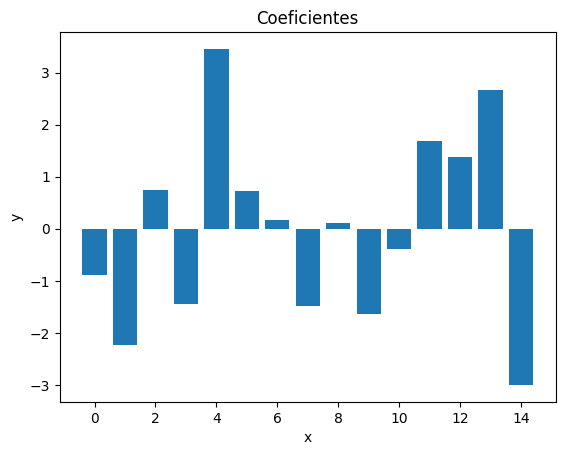

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

# prueba

In [54]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.4       , 0.        , 0.38321423, ..., 0.        , 0.68125876,
        0.68125876],
       [0.16666667, 0.        , 0.44708327, ..., 0.        , 0.74018778,
        0.74018778],
       [0.33333333, 0.        , 0.59367293, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.4516223 , ..., 0.        , 0.69840891,
        0.69840891],
       [0.25      , 0.        , 0.52957409, ..., 0.61084882, 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.97839918, ..., 0.        , 0.72324996,
        0.72324996]])

In [55]:
X_test.shape

(800, 17)

In [56]:
predictions = model.predict(X_test)

In [57]:
test["predictions"]=predictions
test

,no_matcheadas,contradiction,simBoW,sumas,semantics,mutinf_t,contra,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,negH,overlap_ent,H_grupo1,h_k_grupo2,h_k_grupo3,clases,predictions
0,0.400000,0.0,0.369274,0.000000,1.000000,4.434350,0.0,0,5,0.000000,0,0.000000,0,0.600000,0.000000,2.916056,2.916056,YES,1
1,0.166667,0.0,0.430820,0.000000,1.000000,4.429481,0.0,0,5,0.000000,0,0.000000,0,0.833333,0.000000,3.168296,3.168296,YES,1
2,0.333333,0.0,0.572078,0.000000,0.000000,3.155371,0.0,0,3,0.076923,0,0.811278,0,0.666667,0.000000,0.000000,0.000000,YES,1
3,0.000000,0.0,0.654654,0.000000,0.000000,3.957290,0.0,0,5,0.055556,0,0.650022,0,1.000000,0.000000,0.000000,0.000000,YES,1
4,0.250000,0.0,0.332182,0.028529,0.477859,3.339943,0.0,0,2,0.117647,0,1.000000,0,0.750000,1.792195,0.000000,0.000000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.400000,0.0,0.400320,0.000000,1.000000,4.383406,0.0,0,5,0.000000,0,0.000000,0,0.600000,0.000000,3.266333,3.266333,YES,1
796,0.250000,0.0,0.677334,0.000000,0.108632,3.178976,0.0,0,4,0.090909,0,0.918296,0,0.750000,0.000000,0.000000,0.000000,NO,1
797,0.000000,0.0,0.435194,0.000000,1.000000,4.789178,0.0,0,3,0.000000,0,0.000000,0,1.000000,0.000000,2.989466,2.989466,UNKNOWN,1
798,0.250000,0.0,0.510310,0.043000,0.129505,4.466536,0.0,0,3,0.100000,0,0.811278,0,0.750000,2.646439,0.000000,0.000000,UNKNOWN,1


In [58]:
test[(test["clases"]=="YES") & (test["predictions"]==1)]

,no_matcheadas,contradiction,simBoW,sumas,semantics,mutinf_t,contra,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,negH,overlap_ent,H_grupo1,h_k_grupo2,h_k_grupo3,clases,predictions
0,0.400000,0.0,0.369274,0.0,1.0,4.434350,0.0,0,5,0.000000,0,0.000000,0,0.600000,0.000000,2.916056,2.916056,YES,1
1,0.166667,0.0,0.430820,0.0,1.0,4.429481,0.0,0,5,0.000000,0,0.000000,0,0.833333,0.000000,3.168296,3.168296,YES,1
2,0.333333,0.0,0.572078,0.0,0.0,3.155371,0.0,0,3,0.076923,0,0.811278,0,0.666667,0.000000,0.000000,0.000000,YES,1
3,0.000000,0.0,0.654654,0.0,0.0,3.957290,0.0,0,5,0.055556,0,0.650022,0,1.000000,0.000000,0.000000,0.000000,YES,1
5,0.250000,0.0,0.516398,0.0,0.0,3.278925,0.0,1,2,0.100000,0,1.500000,0,0.750000,1.916642,0.000000,2.846439,YES,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.000000,0.0,0.612372,0.0,1.0,4.734731,0.0,0,5,0.000000,0,0.000000,0,1.000000,0.000000,3.499228,3.499228,YES,1
786,0.000000,0.0,0.475191,0.0,0.0,3.963097,0.0,0,6,0.043478,0,0.591673,0,1.000000,0.000000,0.000000,0.000000,YES,1
790,0.166667,0.0,0.500000,0.0,1.0,4.600556,0.0,0,6,0.000000,0,0.000000,0,0.833333,0.000000,2.780639,2.780639,YES,1
794,0.142857,0.0,0.763763,0.0,1.0,4.719586,0.0,0,7,0.000000,0,0.000000,0,0.857143,0.000000,2.355389,2.355389,YES,1


array([<Axes: title={'center': 'h_k_grupo2'}, xlabel='clases'>,
       <Axes: title={'center': 'h_k_grupo3'}, xlabel='clases'>],
      dtype=object)

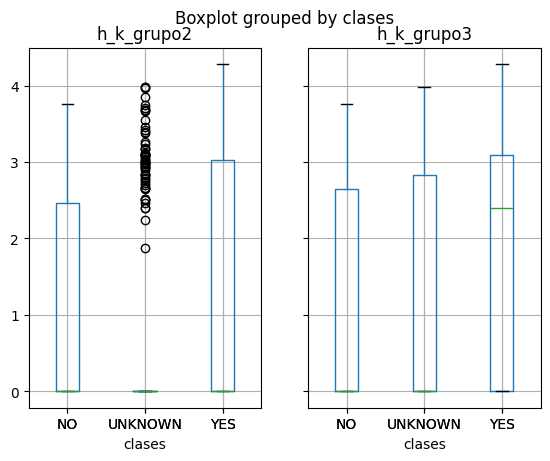

In [59]:
test.boxplot(by="clases",column=["h_k_grupo2","h_k_grupo3"])

In [60]:
test.columns

Index(['no_matcheadas', 'contradiction', 'simBoW', 'sumas', 'semantics',
       'mutinf_t', 'contra', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'negH', 'overlap_ent', 'H_grupo1',
       'h_k_grupo2', 'h_k_grupo3', 'clases', 'predictions'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

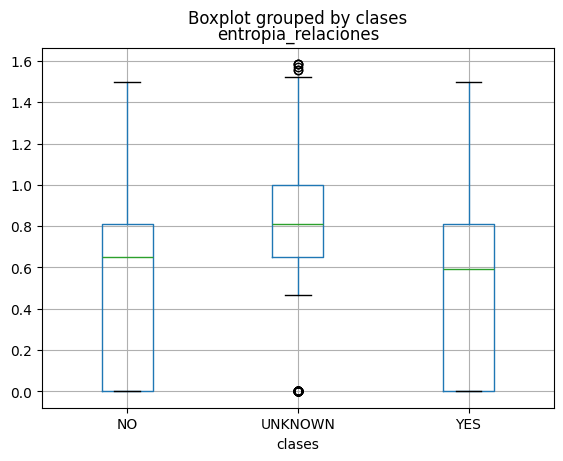

In [61]:
test.boxplot(by="clases",column=["entropia_relaciones"])

In [62]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[337  72   1]
 [137 180   1]
 [ 62   9   1]]


In [64]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.65
precision:  0.63
recall 0.65
f1_score:  0.61
matthews_score:  0.35


In [65]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.65
precision:  0.63
recall 0.65
f1_score:  0.61
matthews_score:  0.35


In [66]:
X_train.shape

(800, 17)

In [67]:
X_test.shape

(800, 17)

In [68]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [69]:
X_train_cv=X_cv
Y_train_cv=Y_cv

In [70]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.660000 (0.105889)
Logistic Regression Precision:: 0.600000 (0.147417)
Logistic Regression Recall:: 0.660000 (0.105889)
Logistic Regression F1-score:: 0.620000 (0.142322)


In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s


Logistic Regression Precision:: 0.430000 (0.090634)
Logistic Regression Recall:: 0.460000 (0.077349)
Logistic Regression F1-score:: 0.440000 (0.097961)


In [72]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.105889)
Logistic Regression Recall:: 0.660000 (0.105889)
Logistic Regression F1-score:: 0.660000 (0.105889)


In [73]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.340000 (0.229872)


In [74]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [75]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.63      0.82      0.71       410
           2       0.69      0.57      0.62       318

    accuracy                           0.65       800
   macro avg       0.55      0.47      0.45       800
weighted avg       0.63      0.65      0.61       800

[[  1  62   9]
 [  1 337  72]
 [  1 137 180]]


In [ ]:
#   precision    recall  f1-score   support

#            0       0.91      0.77      0.83       712
#            1       0.72      0.79      0.75      1404
#            2       0.85      0.84      0.85      2790

#     accuracy                           0.82      4906
#    macro avg       0.83      0.80      0.81      4906
# weighted avg       0.82      0.82      0.82      4906

# [[ 546   52  114]
#  [   3 1114  287]
#  [  54  383 2353]]

In [75]:
validation_size = 0.25
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)#,random_state=7
model.fit(X_train_cv,Y_train_cv)
predictionsVale = model.predict(X_validation_cv)
print("acccuracy: ",round(accuracy_score(Y_validation_cv,predictionsVale),2))
print("precision: ",round(precision_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("recall",round(recall_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("f1_score: ",round(f1_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(Y_validation_cv,predictionsVale),2))
print(confusion_matrix(Y_validation_cv,predictionsVale,labels=[2,1,0]))

acccuracy:  0.81
precision:  0.82
recall 0.81
f1_score:  0.81
matthews_score:  0.67
[[1099  201   26]
 [ 129  531    2]
 [  57   28  264]]


# Análisis adicional

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7),
      "solver": ['lbfgs']}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'solver': 'lbfgs'}
accuracy : 0.8022131047526081


In [109]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'solver': 'lbfgs'}
accuracy : 0.805592499949159


In [110]:
predictions_grid=logreg_cv.predict(X_test)

In [111]:
print(confusion_matrix(y_test,predictions_grid))

[[ 539   58  115]
 [   4 1124  276]
 [  54  406 2330]]


In [112]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
model = svm.SVC()   
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
              'decision_function_shape': ['ovo','ovr']}  
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.776 total time=   0.8s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.753 total time=   0.8s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.831 total time=   0.8s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.812 total time=   0.8s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.805 total time=   0.8s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.7s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.7s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.839 total time=   0.8s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.7s
[CV 5/5] END

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
grid.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}

In [114]:
#{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [115]:
grid.best_score_

0.8166265476299298

In [116]:
predictions_grid=grid.predict(X_test)

In [117]:
confusion_matrix(y_test,predictions_grid,labels=[0,1,2])

array([[ 526,   47,  139],
       [   3, 1109,  292],
       [  53,  337, 2400]])

In [118]:
print(classification_report(y_test, predictions_grid))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       712
           1       0.74      0.79      0.77      1404
           2       0.85      0.86      0.85      2790

    accuracy                           0.82      4906
   macro avg       0.83      0.80      0.81      4906
weighted avg       0.83      0.82      0.82      4906



In [119]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC()

In [ ]:
test.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'semantics2', 'entail', 'contra',
       'neutral', 'no_match', 'rel_conceptuales', 'entropia_relacionesNC',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler_rit2',
       'KL_divergence', 'negT', 'negH', 'overlap_ent', 'meteor', 'meteor_t',
       'clases', 'predictions'],
      dtype='object')

In [ ]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'semantics2', 'entail', 'contra',
       'neutral', 'no_match', 'rel_conceptuales', 'entropia_relacionesNC',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler_rit2',
       'KL_divergence', 'negT', 'negH', 'overlap_ent', 'meteor', 'meteor_t'],
      dtype='object')

In [ ]:
explainer.expected_value

array([-0.97658789, -0.00407925,  0.98066715])

In [ ]:
X_test

array([[0.78964869, 0.68306189, 0.35307294, ..., 0.        , 0.        ,
        0.27217093],
       [0.89238683, 0.65964568, 0.47736158, ..., 0.66666667, 0.        ,
        0.22967324],
       [0.92036796, 0.63778378, 0.40564367, ..., 0.33333333, 0.        ,
        0.13245248],
       ...,
       [0.89596724, 0.24440408, 0.29697785, ..., 0.        , 0.        ,
        0.1920561 ],
       [0.89826534, 0.45528147, 0.49213067, ..., 0.        , 0.        ,
        0.        ],
       [0.8957379 , 0.52617594, 0.58566445, ..., 0.        , 0.        ,
        0.03223319]])

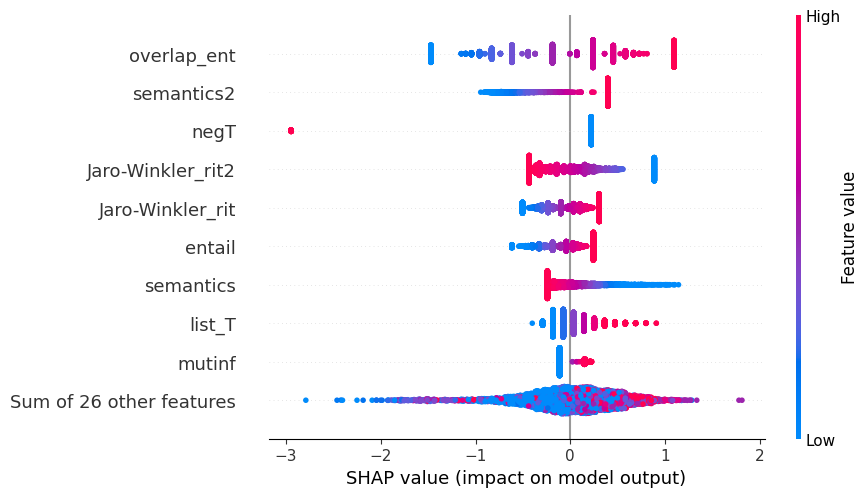

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1])

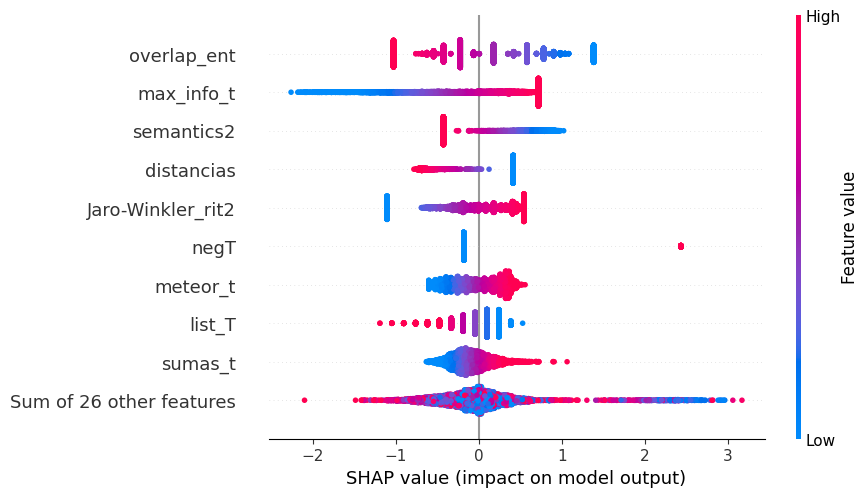

In [ ]:
shap.plots.beeswarm(shap_values[:,:,0])

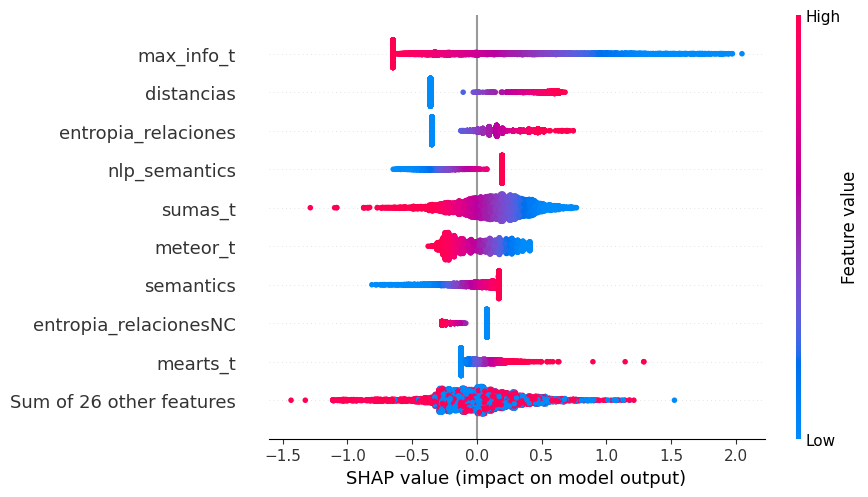

In [ ]:
shap.plots.beeswarm(shap_values[:,:,2])

In [ ]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.4751967  0.24555819 0.87544949 0.78537126 0.93112685 0.10731264
 0.47481402 0.25       0.0952381  0.         0.375      0.25
 0.4        0.83333333 0.         0.         0.25      ] 2 2


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [ ]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

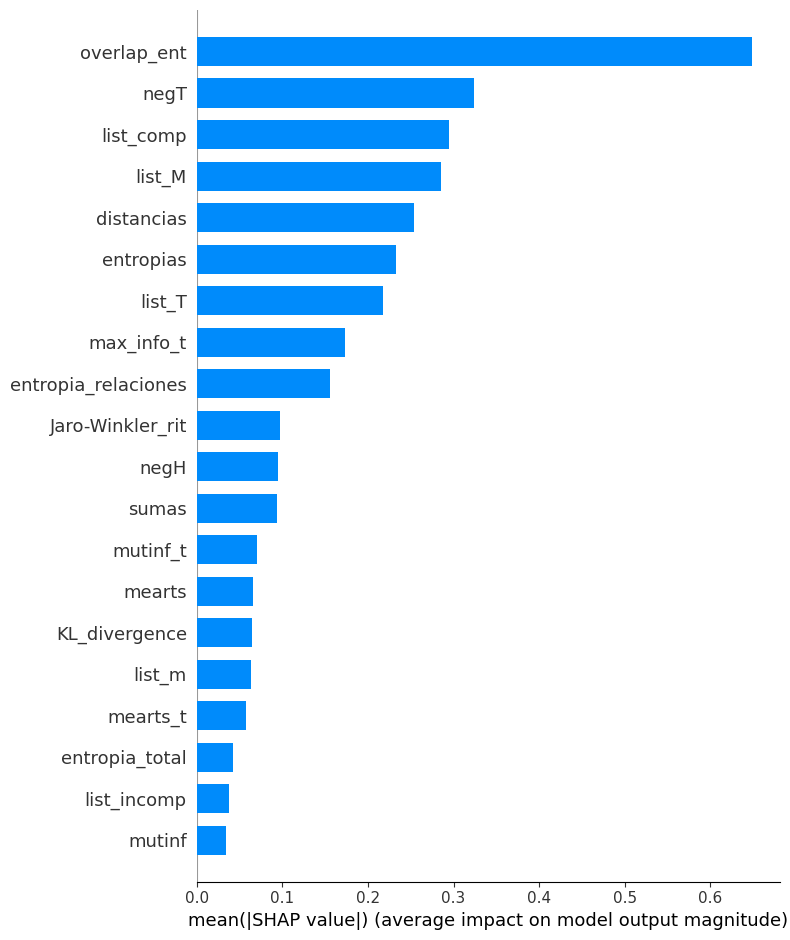

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

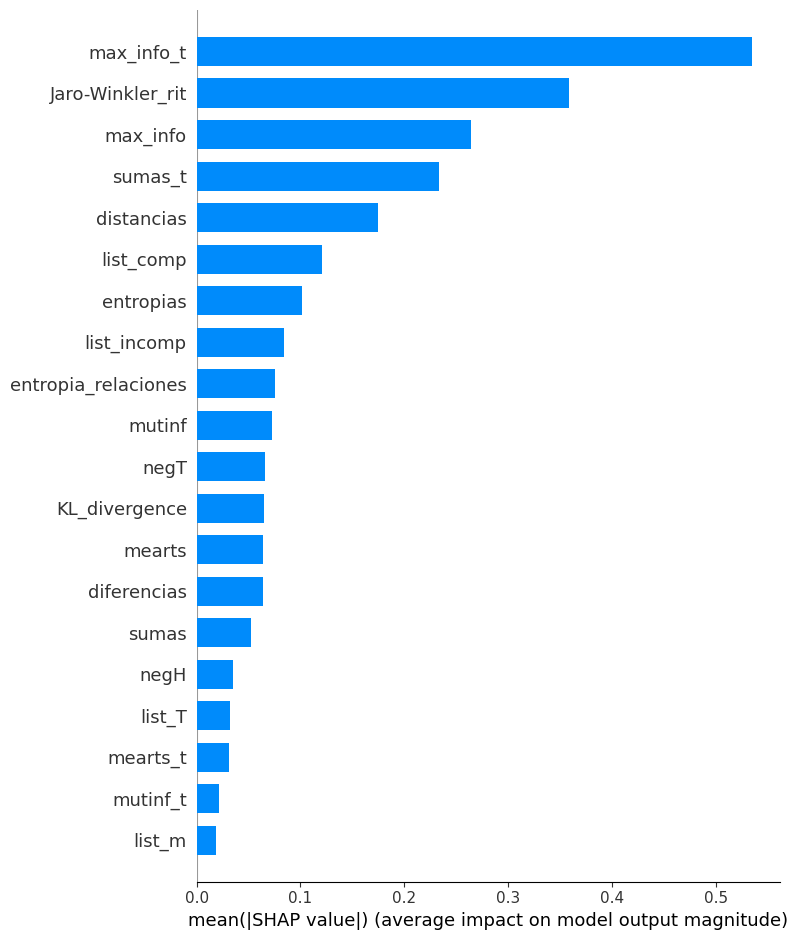

In [ ]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

In [ ]:
X_test

array([[0.87330036, 0.68306189, 0.579461  , ..., 0.        , 0.        ,
        0.        ],
       [0.91316265, 0.65964568, 0.43449354, ..., 0.        , 0.        ,
        0.66666667],
       [0.9246584 , 0.63778378, 0.37642803, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.91400573, 0.24440408, 0.22985031, ..., 0.        , 0.        ,
        0.        ],
       [0.90080125, 0.45528147, 0.42378464, ..., 0.        , 0.        ,
        0.        ],
       [0.89284748, 0.52617594, 0.52618599, ..., 0.        , 0.        ,
        0.        ]])

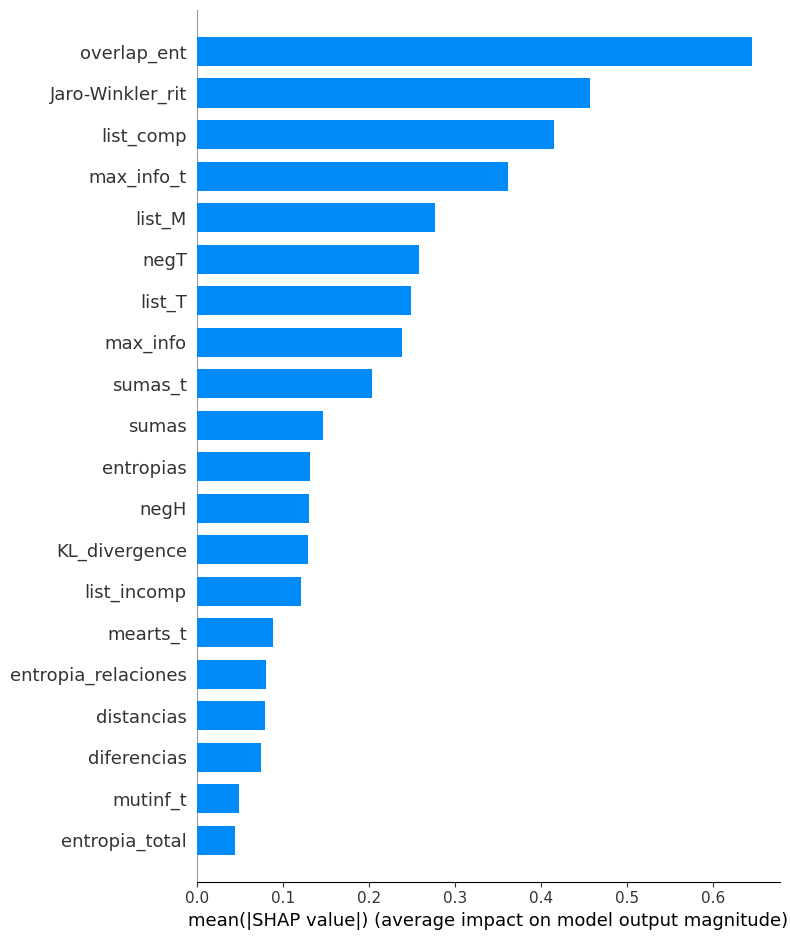

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

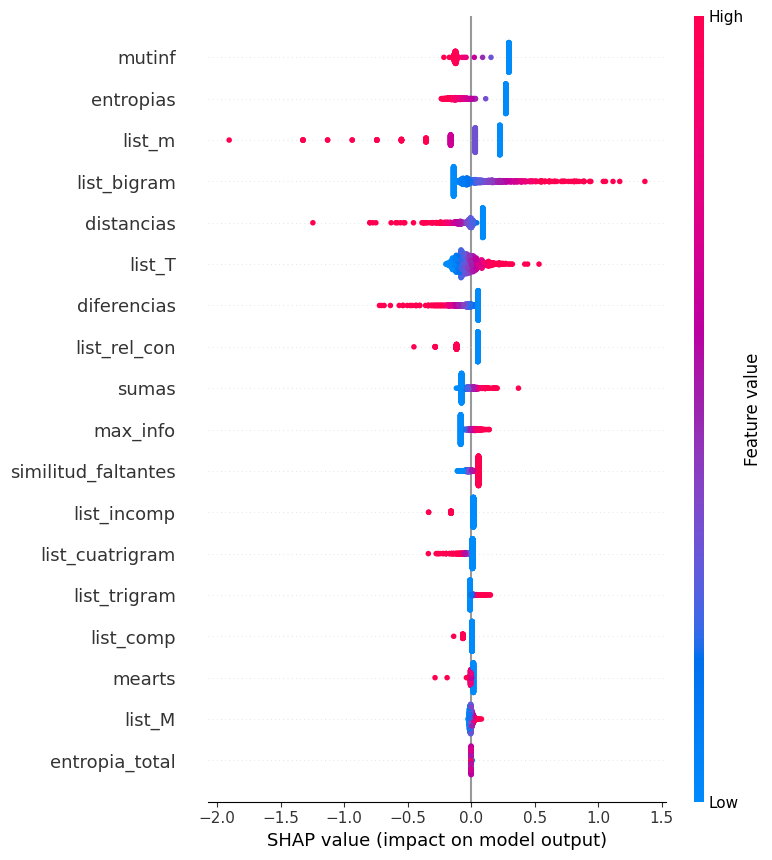

In [ ]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

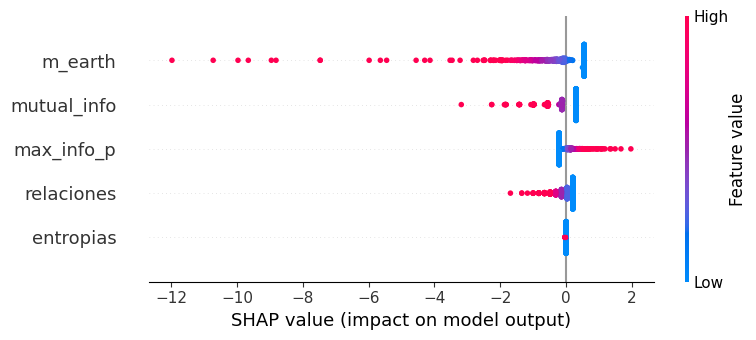

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

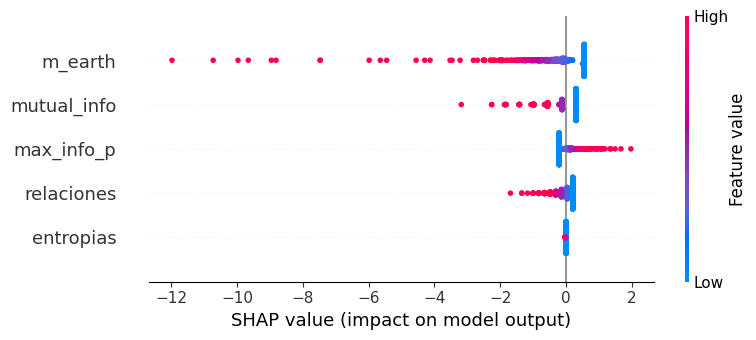

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.67


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.014004)
DecisionTree: 0.680000 (0.010178)
DecisionTree: 0.680000 (0.013535)
DecisionTree: 0.680000 (0.011671)


In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.015553)
DecisionTree: 0.580000 (0.018540)
DecisionTree: 0.580000 (0.016293)
DecisionTree: 0.580000 (0.019133)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred,labels=[1,2,0])

array([[ 860,  303,  241],
       [ 455, 2150,  185],
       [ 288,  158,  266]])

Profundidad del árbol: 23
Número de nodos terminales: 152


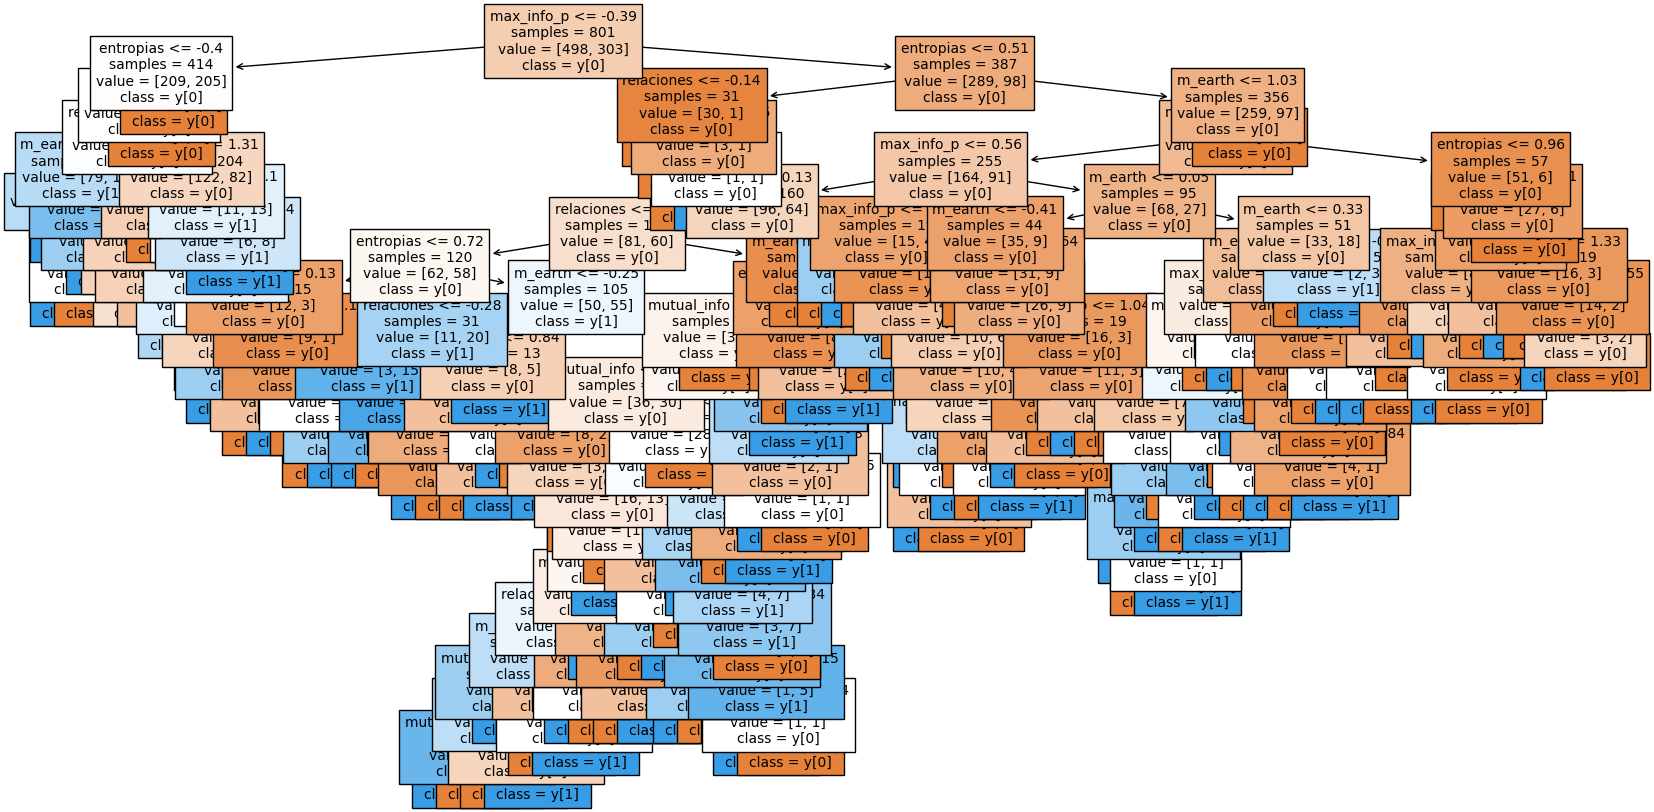

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )